In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem
import os

#Access working directory to read csv
#working_directory = os.getcwd()
#print(working_directory)

# Study data files
mouse_metadata_path = "/Users/tanishacooper/code/matplotlib-challenge/matplotlib-challenge/Pymaceuticals/Resources/Mouse_metadata.csv"
study_results_path = "/Users/tanishacooper/code/matplotlib-challenge/matplotlib-challenge/Pymaceuticals/Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combined = pd.merge(mouse_metadata,study_results, how="inner", on='Mouse ID')

# Display the data table for preview
mouse_study_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(pd.unique(mouse_study_combined['Mouse ID']))
print(num_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = mouse_study_combined.loc[mouse_study_combined.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicate_mice_id)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse = pd.DataFrame(duplicate_mice_id)
all_duplicate_mouse

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_df = mouse_study_combined[mouse_study_combined["Mouse ID"].isin(duplicate_mice_id)==False]
mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(pd.unique(mouse_study_clean_df['Mouse ID']))
print(num_mice_clean)

248


## Summary Statistics

In [7]:
# Checking unique drug regimen in study
drug_names = mouse_study_clean_df["Drug Regimen"].unique()
print(sorted(drug_names))

['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_mean = mouse_study_clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
#print(drug_regimen_mean)
drug_regimen_mean

drug_regimen_median = mouse_study_clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_regimen_median

drug_regimen_variance = mouse_study_clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_regimen_variance

drug_regimen_std = mouse_study_clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_regimen_std

drug_regimen_sem = mouse_study_clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
drug_regimen_sem

# Assemble the resulting series into a single summary dataframe.

summary_table_df = pd.DataFrame({"Mean": drug_regimen_mean, "Median": drug_regimen_median, "Variance": drug_regimen_variance, "Standard Deviation": drug_regimen_std, "SEM": drug_regimen_sem})
summary_table_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

single_group_by = mouse_study_clean_df.groupby('Drug Regimen')
summary_table_single_line = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_table_single_line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Timepoint'>

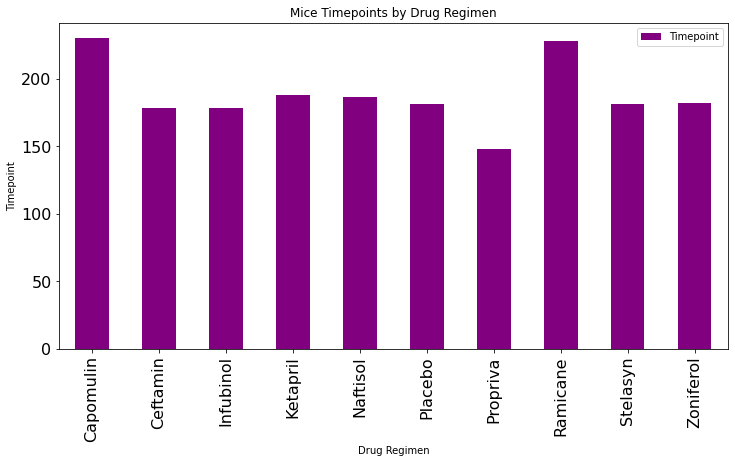

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each 
# drug regimen using Pandas.

bar_timepoints_drugs = mouse_study_clean_df.groupby(["Drug Regimen"]).count()["Timepoint"]
#bar_timepoints_drugs

bar_plot_pandas = bar_timepoints_drugs.plot.bar(x= "Drug Regimen", y= "Timepoint", 
                                         title= "Mice Timepoints by Drug Regimen",
                                                ylabel= "Timepoint",
                                         legend= "Timepoint", rot=90, color="purple",
                                                fontsize = 16, figsize=(12,6))

plt.savefig("/Users/tanishacooper/code/matplotlib-challenge/Images/mice_timepoints_by_drug_pandas")
bar_plot_pandas


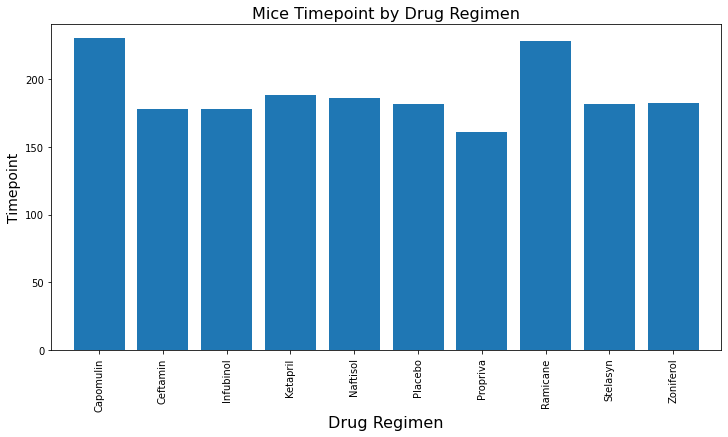

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for 
# each drug regimen using pyplot.

#bar_timepoints_drugs

# Create an array for timepoints
timepoints_list =(mouse_study_combined.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
timepoints_list

# Bar pyplot
x_axis = np.arange(len(bar_timepoints_drugs))
fig1, ax1 = plt.subplots(figsize=(12, 6))
plt.bar(x_axis,timepoints_list)
tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 
                            'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 
                            'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(timepoints_list)+10)

plt.title("Mice Timepoint by Drug Regimen",fontsize = 16)
plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("Timepoint",fontsize = 14)


plt.savefig("/Users/tanishacooper/code/matplotlib-challenge/Images/mice_timepoints_by_drug_pyplot")

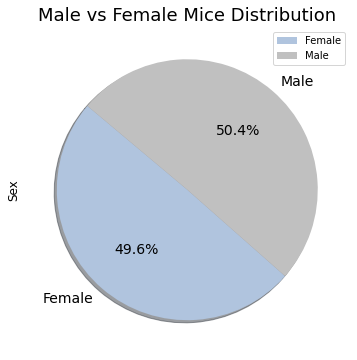

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
groupedby_gender = mouse_study_clean_df.groupby(["Mouse ID", "Sex"])
groupedby_gender
groupedby_gender_df = pd.DataFrame(groupedby_gender.size())

# DataFrame with total count of Female and Male mice

mice_gender = pd.DataFrame(groupedby_gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]
mice_gender

my_colors = ['lightsteelblue','silver']
m_f_pie_chart_pandas = mice_gender.plot.pie(y="Total Count", 
                                            title= "Female vs Males Mice Distribution", 
                                            fontsize= 14, 
                                            figsize=(6,6),autopct="%1.1f%%",
                                           shadow= True, colors= my_colors, startangle= 140)
plt.title('Male vs Female Mice Distribution',fontsize = 18)
plt.ylabel('Sex',fontsize = 12)
plt.show()

plt.savefig("/Users/tanishacooper/code/matplotlib-challenge/Images/mice_population_by_gender_pandas")

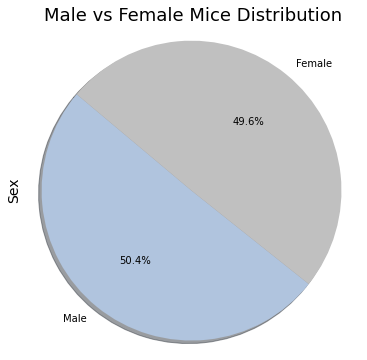

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#show data for the gender table dataframe
#mice_gender

# Create Labels for the sections of the pie
labels = ["Male","Female"]

total_count_gender = [125,123]

fig1, ax1 = plt.subplots(figsize=(6, 6))
plt.pie(total_count_gender,labels=labels, startangle= 140, autopct="%1.1f%%", 
        colors= my_colors, shadow= True)
plt.title("Male vs Female Mice Distribution",fontsize = 18)
plt.ylabel("Sex", fontsize = 14)
plt.axis("equal")
plt.show()

plt.savefig("/Users/tanishacooper/code/matplotlib-challenge/Images/mice_population_by_gender_pyplot")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = pd.DataFrame(mouse_study_clean_df.groupby('Mouse ID')['Timepoint'].max().
                                 sort_values()).reset_index().rename(columns=
                                                                     {"Timepoint": 
                                                                      "max_Timepoint"})
last_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the 
# last timepoint
final_timepoint_df = pd.merge(mouse_study_clean_df, last_timepoint_df, on='Mouse ID')
final_timepoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_treatments_list = ["Capomulin","Ramicane", "Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_values = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes 
for drug in drug_treatments_list:

    temp_df = final_timepoint_df.loc[final_timepoint_df["Drug Regimen"]== drug]
    
    # Create subset dataframes that narrow down to rows only containing the final timepoint
    #for each drug regimen
    final_tumor_vol_df = temp_df.loc[temp_df["Timepoint"]== temp_df["max_Timepoint"]]

    # Create a series that consists of all final volume values for each regimen
    values = final_tumor_vol_df['Tumor Volume (mm3)']
    tumor_volume_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_tumor_vol_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_tumor_vol_df['Tumor Volume (mm3)'] 
                                         <= lower_bound)]).count()
   
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


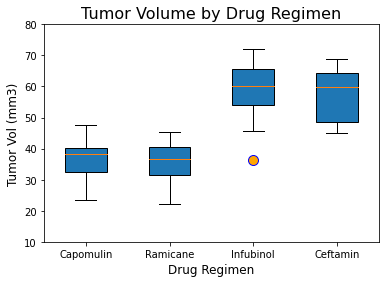

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Show outliers on boxplot for visibility

outlier_design = dict(marker="o", markerfacecolor="orange", markersize=10, 
                      markeredgecolor="blue")

# Create Boxplot

plt.boxplot(tumor_volume_values, widths=0.5, patch_artist=True, flierprops=outlier_design)
plt.title('Tumor Volume by Drug Regimen', fontsize= 16)
plt.xlabel('Drug Regimen', fontsize=12) 
plt.ylabel('Tumor Vol (mm3)', fontsize=12)
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylim(10, 80)

plt.savefig("/Users/tanishacooper/code/matplotlib-challenge/Images/tumor_volume_by_drug_regimen_boxplot")
plt.show()

## Line and Scatter Plots

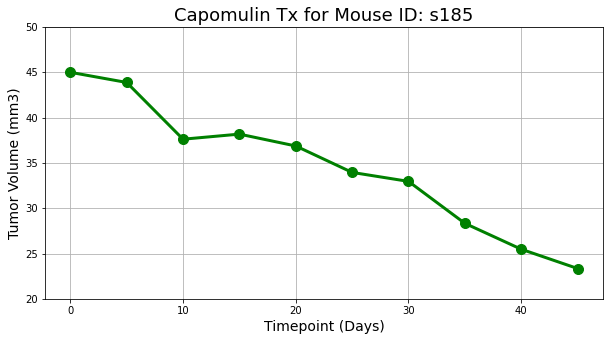

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Capomulin_df

Capomulin_df = mouse_study_combined.loc[mouse_study_combined["Drug Regimen"] == "Capomulin",:]

cap_line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"]== "s185",:]
cap_line_df.head()

cap_timepoint_x_axis = cap_line_df["Timepoint"]
cap_tumorsize_y_axis = cap_line_df["Tumor Volume (mm3)"]


fig1, axl = plt.subplots(figsize= (10,5))
plt.plot(cap_timepoint_x_axis, cap_tumorsize_y_axis, linewidth=3, markersize=10,
        marker="o", color="green")
plt.title("Capomulin Tx for Mouse ID: s185", fontsize= 18)
plt.xlabel("Timepoint (Days)", fontsize= 14)
plt.ylabel("Tumor Volume (mm3)", fontsize= 14)
plt.grid(True)
plt.ylim(20, 50)

plt.savefig("/Users/tanishacooper/code/matplotlib-challenge/Images/capomulin_tx_tumvol_line")
plt.show()

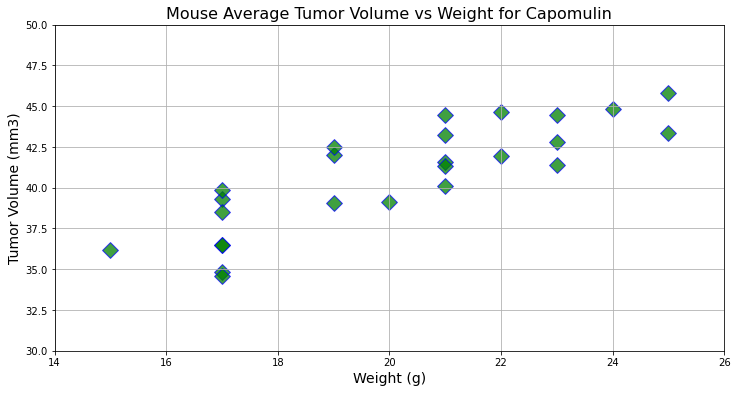

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

wgt_avg_tum_vol_cap = Capomulin_df.groupby(["Mouse ID"]).mean()
# wgt_avg_tum_vol_cap

fig1,ax1 = plt.subplots(figsize= (12,6))
plt.scatter(wgt_avg_tum_vol_cap["Weight (g)"], 
            wgt_avg_tum_vol_cap["Tumor Volume (mm3)"], s= 125, 
            c= "green", marker= "D", alpha=0.75, edgecolors="blue")
plt.title("Mouse Average Tumor Volume vs Weight for Capomulin", fontsize= 16)
plt.xlabel("Weight (g)", fontsize= 14)
plt.ylim(30,50)
plt.xlim(14,26)
plt.ylabel("Tumor Volume (mm3)", fontsize= 14)
plt.grid(True)
plt.savefig("/Users/tanishacooper/code/matplotlib-challenge/Images/avg_tumor_vol_weight_cap_scatter")
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The r-squared is: 0.71


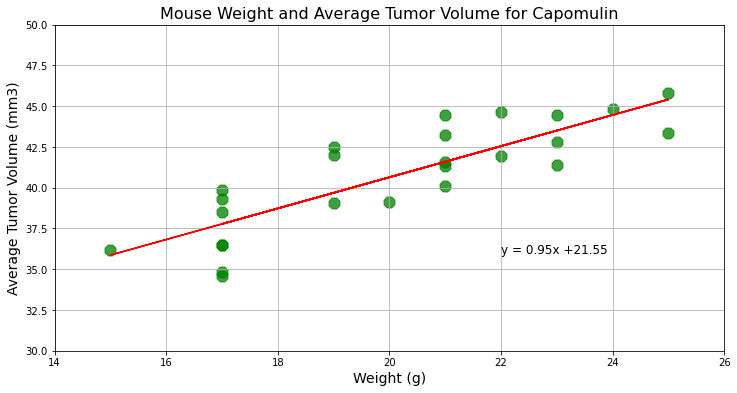

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation Coefficiant
#wgt_avg_tum_vol_cap
weight = wgt_avg_tum_vol_cap.iloc[:,1]
weight

avg_tumor_volume = wgt_avg_tum_vol_cap.iloc[:,3]
avg_tumor_volume

cap_correlation = st.pearsonr(weight, avg_tumor_volume)
cap_correlation

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, avg_tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Scatter plot with regression line
fig1,ax1 = plt.subplots(figsize= (12,6))
plt.scatter(weight,avg_tumor_volume, s= 140, c= "green", 
            marker="8", alpha=.75, edgecolors="green")
plt.plot(weight,regress_values, "r-")
plt.annotate(line_eq, (22,36), fontsize=12,color="black")
plt.title('Mouse Weight and Average Tumor Volume for Capomulin', fontsize= 16)
plt.xlabel("Weight (g)", fontsize= 14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize= 14)
plt.ylim(30,50)
plt.xlim(14,26)
plt.grid(True)

print(f"The correlation between both factors is {round(cap_correlation[0],2)}")
print(f"The r-squared is: {round(rvalue**2,2)}")

plt.savefig("/Users/tanishacooper/code/matplotlib-challenge/Images/mouse_wgt_tumor_volume_cap_corr_regress")
plt.show()